# <center>HW01 </center>
### Author:
Issac Sepulveda - A01783245
### Date:
13 de Mayo 2025

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [9]:
# Load the dataset
file_path = "S02_DataStud.xlsx"
df = pd.read_excel(file_path)

# Selecting only numerical columns for analysis
numeric_columns = ["Final Grade", "Participacion", "Kahoot", "Homework", "Evidence", "Final Exam"]

In [ ]:
summary = pd.DataFrame(index=['Media', 'Desviación estándar', 'Asimetría', 'Curtosis', 'Q1', 'Q2 (Mediana)', 'Q3'])

for col in cols:
    summary[col] = [
        data[col].mean(),
        data[col].std(),
        skew(data[col], bias=False),
        kurtosis(data[col], bias=False),
        data[col].quantile(0.25),
        data[col].median(),
        data[col].quantile(0.75)
    ]

print("Resumen estadístico completo:")
print(summary)

In [10]:
# Calculate descriptive statistics
desc_stats = df[numeric_columns].describe().T
desc_stats["Skewness"] = df[numeric_columns].apply(skew)
desc_stats["Kurtosis"] = df[numeric_columns].apply(kurtosis)

# Display descriptive statistics table
print(desc_stats)

               count       mean        std        min        25%        50%  \
Final Grade     61.0  81.358111  17.271805  13.287021  79.331973  85.311488   
Participacion   61.0  74.132925   6.583450  58.000001  70.937501  73.562500   
Kahoot          61.0  80.949018  20.503669  27.860799  75.088479  87.563901   
Homework        61.0  85.778689  18.484845   0.000000  86.250000  91.250000   
Evidence        61.0  81.934426  26.157133   0.000000  82.000000  94.000000   
Final Exam      61.0  81.203279  23.989963   0.000000  74.800000  85.400000   

                     75%         max  Skewness  Kurtosis  
Final Grade    91.207010   99.930185 -2.594830  7.034071  
Participacion  79.062501   88.562500 -0.123420 -0.011705  
Kahoot         95.900511   99.999999 -1.515060  1.335201  
Homework       95.000000  100.000000 -3.116783  9.694938  
Evidence       94.000000  100.000000 -2.529868  5.220967  
Final Exam     95.800000  108.000000 -1.884289  4.166538  


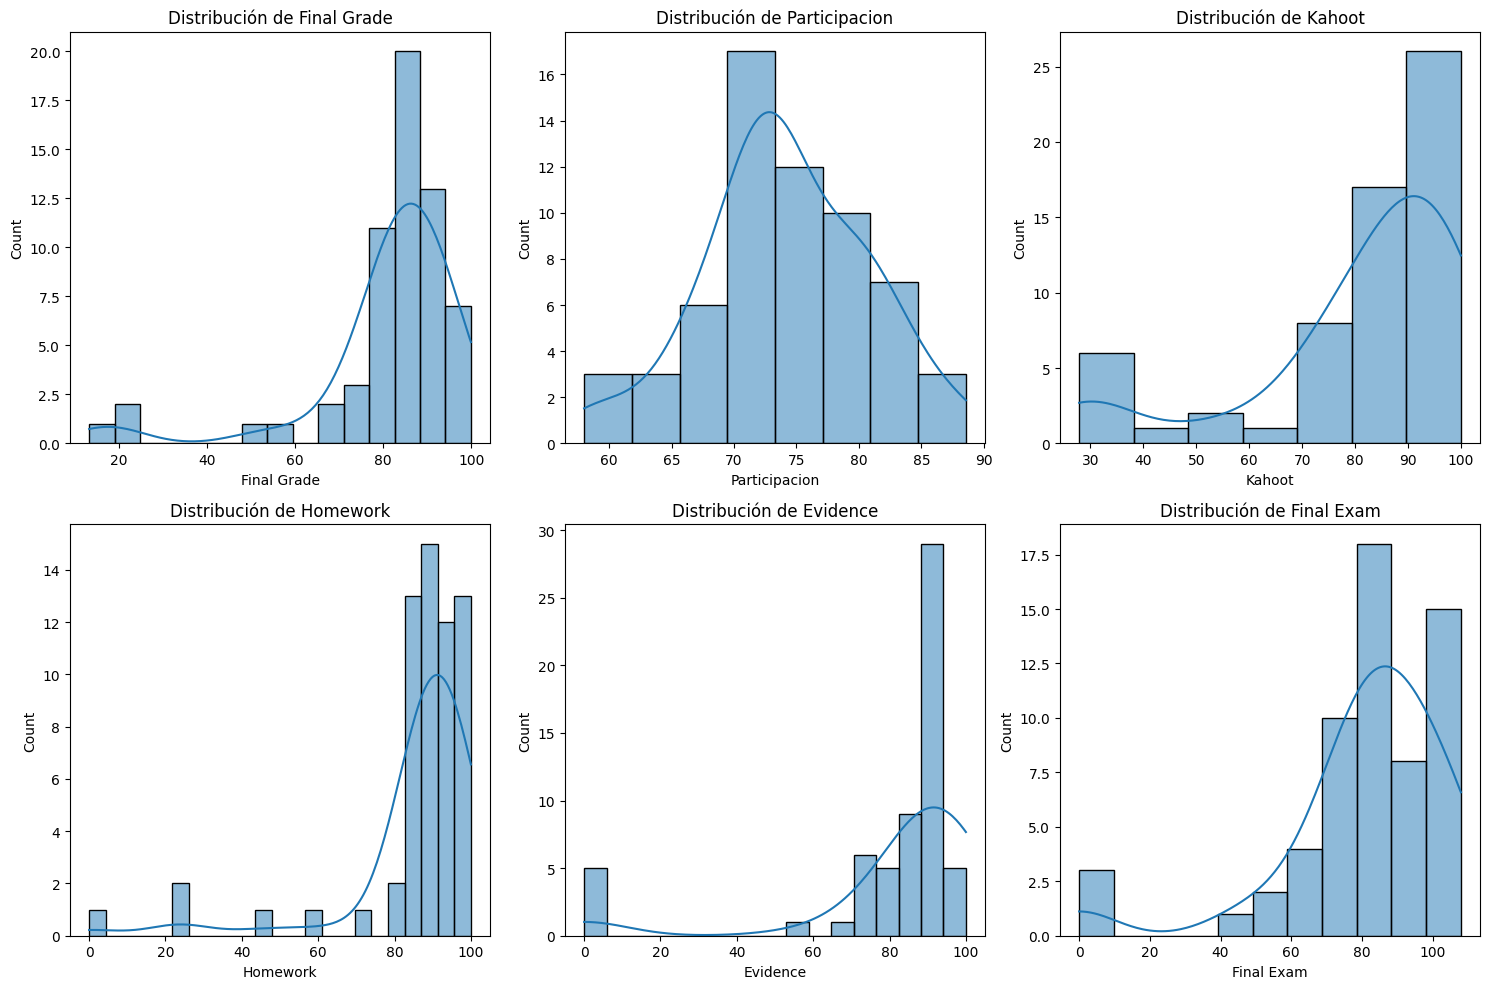

In [11]:
# Generate histograms for all numeric variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

In [12]:
# Pearson correlation matrix
corr_matrix = df[numeric_columns].corr(method='pearson')
print("\nMatriz de correlaciones de Pearson:")
print(corr_matrix)


Matriz de correlaciones de Pearson:
               Final Grade  Participacion    Kahoot  Homework  Evidence  \
Final Grade       1.000000       0.668318  0.845145  0.858192  0.835415   
Participacion     0.668318       1.000000  0.611148  0.472772  0.505562   
Kahoot            0.845145       0.611148  1.000000  0.637111  0.701039   
Homework          0.858192       0.472772  0.637111  1.000000  0.610341   
Evidence          0.835415       0.505562  0.701039  0.610341  1.000000   
Final Exam        0.940511       0.626309  0.725763  0.747572  0.698862   

               Final Exam  
Final Grade      0.940511  
Participacion    0.626309  
Kahoot           0.725763  
Homework         0.747572  
Evidence         0.698862  
Final Exam       1.000000  


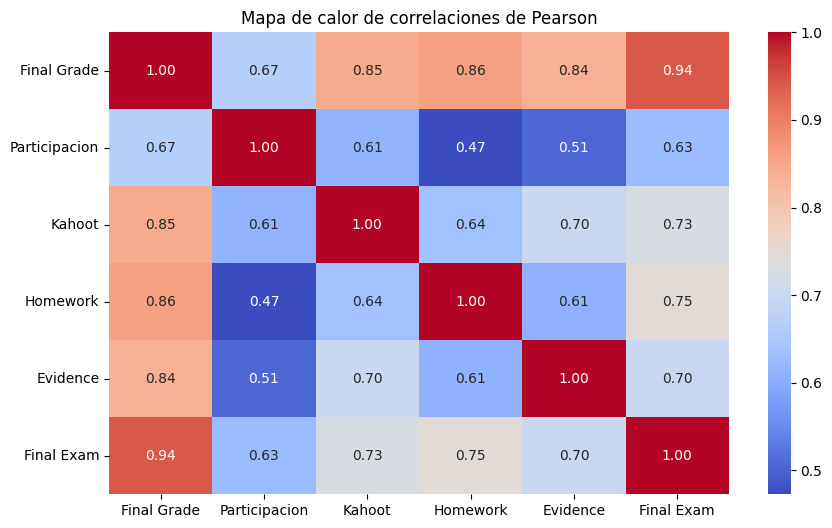

In [13]:
# Display heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones de Pearson")
plt.show()

In [27]:
import statsmodels.api as sm
from scipy.stats import jarque_bera

# Variables independientes y dependiente
independent_vars = ["Participacion", "Kahoot", "Homework", "Evidence", "Final Exam"]
dependent_var = "Final Grade"

# Lista para almacenar resultados
results_list = []

# Iterar sobre cada variable independiente y construir modelos
for var in independent_vars:
    X = sm.add_constant(df[var])  # Agregar constante
    y = df[dependent_var]
    
    model = sm.OLS(y, X).fit()
    
    # Extraer métricas del modelo
    coef = model.params[var]
    p_value = model.pvalues[var]
    r2 = model.rsquared
    r2_adj = model.rsquared_adj
    jb_p_value = jarque_bera(model.resid)[1]  # Prueba de normalidad

    # Agregar resultados con título en formato APA
    results_list.append({
        "Variable Independiente": var,
        "Coeficiente Estimado": coef,
        "Valor P": p_value,
        "R²": r2,
        "R² Ajustado": r2_adj,
        "Valor P Jarque Bera": jb_p_value
    })

# Convertir lista a DataFrame y mostrar tabla ordenada
results_df = pd.DataFrame(results_list)

# Mostrar tabla profesional
print("\nTabla Resumen de Modelos de Regresión Lineal Simple\n")
print("La Variable Dependiente fue la de Final Grade\n")
print(results_df.to_string(index=False))
    


Tabla Resumen de Modelos de Regresión Lineal Simple

La Variable Dependiente fue la de Final Grade

Variable Independiente  Coeficiente Estimado      Valor P       R²  R² Ajustado  Valor P Jarque Bera
         Participacion              1.753345 3.979081e-09 0.446649     0.437270         5.395706e-06
                Kahoot              0.711930 1.085522e-17 0.714270     0.709427         6.377447e-08
              Homework              0.801875 9.815377e-19 0.736494     0.732028         8.468925e-24
              Evidence              0.551632 5.668125e-17 0.697918     0.692798         6.592469e-01
            Final Exam              0.677130 2.397585e-29 0.884561     0.882605         4.413917e-01


In [33]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Crear documento Word
doc = Document()
doc.add_heading("Informe de Análisis de Desempeño Académico", level=1)

# Filtrar solo columnas numéricas
numeric_columns = ["Final Grade", "Participacion", "Kahoot", "Homework", "Evidence", "Final Exam"]
df_numeric = df[numeric_columns]

# Sección: Tabla de Estadísticas Descriptivas
doc.add_heading("Tabla de Estadísticas Descriptivas", level=2)
desc_stats = df_numeric.describe().T
desc_stats["Skewness"] = df_numeric.skew()
desc_stats["Kurtosis"] = df_numeric.kurtosis()

# Crear tabla en Word
table = doc.add_table(rows=1, cols=len(desc_stats.columns) + 1)
table.style = "Table Grid"

# Encabezados
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Variable"
for i, col_name in enumerate(desc_stats.columns):
    hdr_cells[i + 1].text = col_name

# Insertar datos en la tabla
for index, row in desc_stats.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = index  # Nombre de la variable
    for i, value in enumerate(row):
        row_cells[i + 1].text = str(round(value, 2))

# Sección: Histogramas en Word
doc.add_heading("Histogramas de Variables Académicas", level=2)
for col in numeric_columns:
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.histplot(df[col], kde=True, bins=10, edgecolor="black", ax=ax)
    ax.set_title(f"Distribución de {col}")
    
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format="png")
    plt.close(fig)
    
    doc.add_paragraph(f"Histograma de {col}")
    doc.add_picture(img_stream, width=Inches(4))

# Guardar el documento final
doc.save("Informe_Analisis.docx")

print("✅ Documento Word generado exitosamente con tablas y gráficas.")

✅ Documento Word generado exitosamente con tablas y gráficas.
